In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [7]:
# Loads in all the data from the master data folder
data_path  = 'data\master_data'
data_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
data       = [np.loadtxt(os.path.join(data_path, file), delimiter=',') for file in data_files]

dark = data[0]
beam = data[1]
flat = data[2]

In [8]:
# Gets the cleaned beam data and the coordinate variables
cleaned_beam = beam - (flat - dark)

dim_y, dim_x = cleaned_beam.shape
x_pix = np.linspace(0,10, dim_x)
y_pix = np.linspace(0,10, dim_y)

dx = 6.45 # micrometers
dy = dx
x_coords = x_pix * dx
y_coords = y_pix * dy

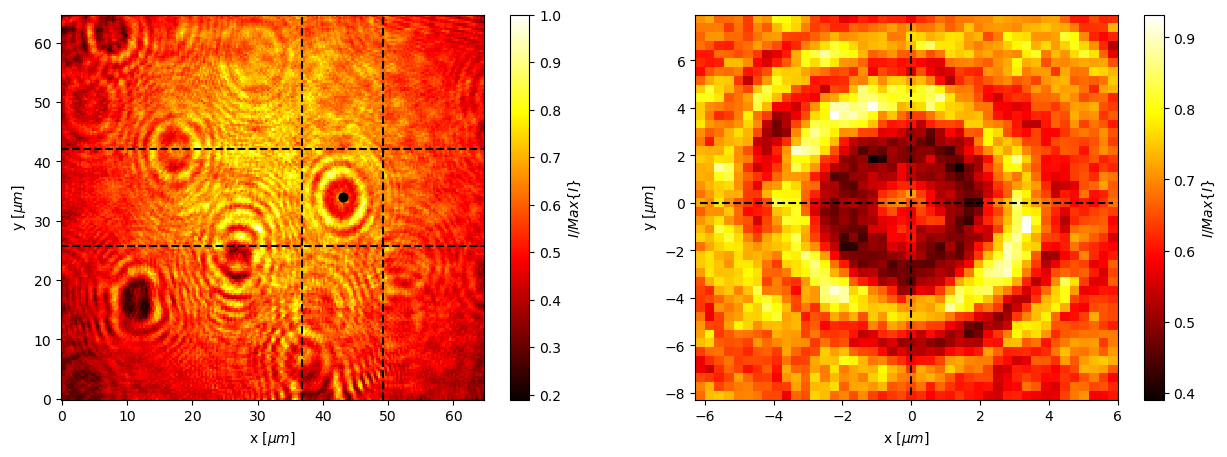

In [12]:
# Plots the master dark
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

## PLot 1: Total Picture
ax1.pcolormesh(x_coords, y_coords, cleaned_beam / np.max(cleaned_beam), label='cleaned beam', cmap = 'hot')
ax1.set_xlabel('x [$\mu m$]')
ax1.set_ylabel('y [$\mu m$]')

# Sets a colourbar
cbar = plt.colorbar(ax1.pcolormesh(x_coords, y_coords, cleaned_beam / np.max(cleaned_beam), cmap = 'hot'))
# cbar = plt.colorbar(ax.pcolormesh(master_dark, cmap = 'hot'))
cbar.set_label('$I/Max\{I\}$')
# ax1.set_aspect('equal')

# Sets the middle of the plot
ix = 121
iy = 112
# Plots a box around the point of interest
i1x = 154
i1y = 92
ax1.plot(x_coords[i1x], y_coords[i1y], 'ko')
d = 22
x_start = i1x - d; x_end = i1x + d
y_start = i1y - d ; y_end   = i1y + d
ax1.axvline(x_coords[x_start], color='k', linestyle='--')
ax1.axvline(x_coords[x_end], color='k', linestyle='--')
ax1.axhline(y_coords[y_start], color='k', linestyle='--')
ax1.axhline(y_coords[y_end], color='k', linestyle='--')

# Plots points at the center of each dust
# particle diffraction pattern
i1x = 154
i1y = 92
ax1.plot(x_coords[i1x], y_coords[i1y], 'ko')

# Plot 2: Zoomed in picture
# Shifts the coordinates to be centered around the middle of the airy disk
x_shift = x_coords[x_start:x_end] - x_coords[i1x]
y_shift = y_coords[y_start:y_end] - y_coords[i1y]

ax2.pcolormesh(x_shift, y_shift, cleaned_beam[y_start:y_end, x_start:x_end] / np.max(cleaned_beam), label='cleaned beam', cmap = 'hot')
ax2.set_xlabel('x [$\mu m$]')
ax2.set_ylabel('y [$\mu m$]')
cbar = plt.colorbar(ax2.pcolormesh(x_shift, y_shift, cleaned_beam[y_start:y_end, x_start:x_end] / np.max(cleaned_beam), cmap = 'hot'))
cbar.set_label('$I/Max\{I\}$')

# Plots lines on the 2nd plot to show plot belows region
ax2.vlines(0, np.min(y_shift), np.max(y_shift), color = 'k', linestyle='--')
ax2.hlines(0, np.min(x_shift), np.max(x_shift), color = 'k', linestyle='--')

In [13]:
# Gets the zoomed in data normalized to the total max intensity
x_profile = cleaned_beam[i1y, x_start:x_end] / np.max(cleaned_beam)
y_profile = cleaned_beam[y_start:y_end,i1x] / np.max(cleaned_beam)

In [33]:
# fits the profile data with a fourier cosine series
def n_cos(x, n, a):
    L = 4
    return(a * np.cos(n*np.pi*x/L))

def cos_series(x, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10):
    t1 = n_cos(x, 0, a1)
    t2 = n_cos(x, 1, a2)
    t3 = n_cos(x, 1, a3)
    t4 = n_cos(x, 1, a4)
    t5 = n_cos(x, 1, a5)
    t6 = n_cos(x, 1, a6)
    t7 = n_cos(x, 1, a7)
    t8 = n_cos(x, 1, a8)
    t9 = n_cos(x, 1, a9)
    t10 = n_cos(x, 1, a10)
    return(t1+t2+t3+t4+t5+t6+t7+t8+t9+t10)

fit = curve_fit(cos_series, x_shift, x_profile)

In [34]:
fit[0]

array([   0.6230549 ,   41.89566395,   41.89566395,   41.89566395,
         50.44966016,    2.8782388 ,  128.0940585 ,  -28.16848832,
         13.00177491, -292.00347176])

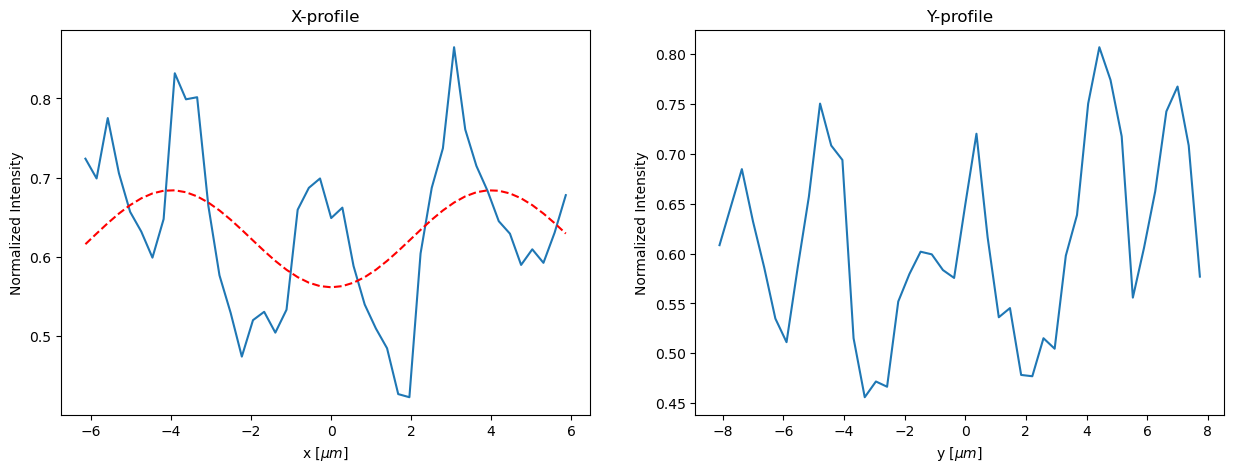

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
# X-profile
ax1.plot(x_shift, x_profile, label='x-profile')
ax1.plot(x_shift, cos_series(x_shift, *fit[0]), 'r--', label='model')
ax1.set_xlabel('x [$\mu m$]')
ax1.set_ylabel('Normalized Intensity')
ax1.set_title('X-profile')

# Y-profile
ax2.plot(y_shift, y_profile, label='y-profile')
ax2.set_xlabel('y [$\mu m$]')
ax2.set_ylabel('Normalized Intensity')
ax2.set_title('Y-profile')

plt.show()